# Assignment 3

# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment3 using this file format:</u> <b>Yourfirstname_lastname_Assignment3.ipynb. Marks might be deducted if you do not follow the submission steps</b> 

#### <b>Deadline</b>: <u>Friday, Oct-15-2020 11:59 PM - NO EXTENSION.</u>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# keras
from keras.datasets import mnist

## Part 0: Prepare the data, 15 Pts, 5 each

*<strong>Q1)</strong> Use the sklearn load_digits() function to collect your data. <br>- You will be using this data for the entire assignment. <br>- Using the .data and .features attributes of this dataset and create a pandas dataframe.*

In [2]:
databunch = datasets.load_digits(as_frame=True)

X = databunch.data
y = databunch.target

*<strong>Q2)</strong> We want to be able to visualize what this data actually looks like.<br>- Use matplotlib.pyplot's imshow function to display the first five items in our dataset. <br>- Be sure to include the target value with these five images.*

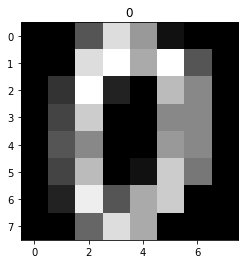

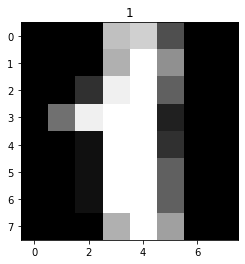

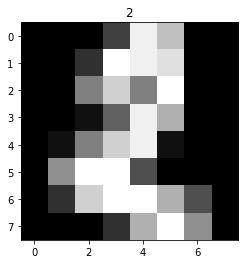

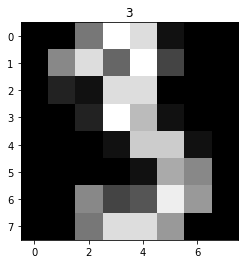

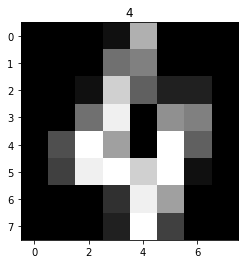

In [3]:
plt.gray()
for i in range(5):
    plt.imshow(databunch.images[i], interpolation='nearest')
    plt.title(i)
    plt.show()

*<strong>Q3)</strong> Our data currently exists in a very high dimensional space. <br>- Reduce the data to a two dimensional space using principle component analysis. <br>- Once this data is transformed, create a scatter plot with different colors for different classes of data-points.*

In [4]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(X)

No handles with labels found to put in legend.


<AxesSubplot:>

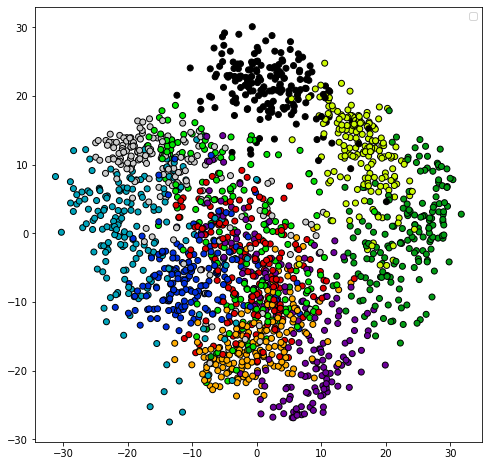

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
ax.legend()
ax.scatter(pca_x[:, 0], pca_x[:, 1], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

ax

*Q4) We need to split our data into two groups in order to validate model performance and generalization ability. <br> - Use the sklearn train_test_split function to obtain training data and testing data. <br>- Important: you must use a test size of 0.25 and a random_state of 0.*

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=None, test_size=0.25, random_state=0)

## Part 1: Regression, 30 Pts, 10 each
*<strong>Q5)</strong> Create a logistic regression model.<br>- Create a LogisticRegression object which can be imported from sklearn's linear_model module.<br>- Call the .fit() function on your model with x_train and y_train as parameters.<br>- Call the .predict() function on your model with x_test as a parameter*

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)

*<strong>Q6)</strong> Visualize the confusion matrix for this model<br>- Use sklearn's confusion matrix function to obtain a confusion matrix in np.array format<br>- Display this confusion matrix as a pandas DataFrame (with target class names in the columns and index fields).<br>- Display this confusion matrix as a heatmap using matplotlib.pyplot's .imshow() function.*

In [8]:
conf_matrix_lr = confusion_matrix(y_test, y_predict_lr, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
df = pd.DataFrame(data=conf_matrix_lr)

df

,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,40,0,0,0,0,0,0,2,1
2,0,1,40,3,0,0,0,0,0,0
3,0,0,0,43,0,0,0,0,1,1
4,0,0,0,0,37,0,0,1,0,0
5,0,0,0,0,0,46,0,0,0,2
6,0,1,0,0,0,0,51,0,0,0
7,0,0,0,1,1,0,0,46,0,0
8,0,3,1,0,0,0,0,0,43,1
9,0,0,0,0,0,1,0,0,1,45


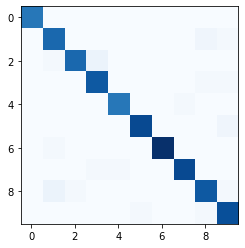

In [9]:
plt.imshow(conf_matrix_lr, interpolation='nearest', cmap=plt.cm.Blues)

*<strong>Q7</strong> Lets examine how well our model performed. <br>- Create a function to calculate the precision values for all classes from the calculated confusion matrix.<br>- Create a function to calculate the recall values for all classes calculated confusion matrix.<br>- Use sklearn's classification_report as a reference for "correct" precision and recall values.*




In [10]:
def calc_precision_val(conf_matrix):
    print("Precision\n---------")
    for i in range(10):
        # TruePositives / (TruePositives + FalsePositives)
        precision = conf_matrix_lr[i][i] / y_test.value_counts(sort=False)[i]
        print(f"{i}: {round(precision, 2)}")

def calc_recall_val(conf_matrix):
    print("Recall\n------")
    for i in range(10):
        # TruePositives / (TruePositives + FalseNegatives)
        precision = conf_matrix_lr[i][i] / y_test.value_counts(sort=False)[i]
        print(f"{i}: {round(precision, 2)}")

In [11]:
print(classification_report(y_test, y_predict_lr))
calc_precision_val(conf_matrix_lr)
calc_recall_val(conf_matrix_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

Precision
---------
0: 1.0
1: 0.93
2: 0.91
3: 0.96
4: 0.97
5: 0.96
6: 0.98
7: 0.96
8: 0.9
9: 0.96
Recall
------
0: 1.0
1: 0.93
2: 0.91
3: 0.96
4: 0.97
5: 0.96
6: 0.98
7: 0.96
8: 0.9
9: 0.96


## Part 2: Support Vector Machine, 20 Pts, 10 each
*<strong>Q8)</strong> Build an SVM classification model.<br>- Create an SVC object which can be imported from sklearn's svm module.<br>- Call the .fit() function on your model with x_train and y_train as parameters.<br>- Call the .predict() function on your model with x_test as a parameter*

In [12]:
svc = SVC()
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)

*<strong>Q9)</strong> Visualize the confusion matrix for this model<br>- Use sklearn's confusion matrix function to obtain a confusion matrix in np.array format<br>- Display this confusion matrix as a pandas DataFrame (with target class names in the columns and index fields).<br>- Display this confusion matrix as a heatmap using matplotlib.pyplot's .imshow() function.*

In [13]:
conf_matrix_svc = confusion_matrix(y_test, y_predict_svc, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
df = pd.DataFrame(data=conf_matrix_svc)

df

,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,43,0,0,0,0,0,0,0,0
2,0,0,44,0,0,0,0,0,0,0
3,0,0,0,44,0,0,0,0,1,0
4,0,0,0,0,38,0,0,0,0,0
5,0,0,0,0,0,47,0,0,0,1
6,0,0,0,0,0,0,52,0,0,0
7,0,0,0,0,0,0,0,48,0,0
8,0,1,0,0,0,0,0,0,47,0
9,0,0,0,0,0,1,0,0,0,46


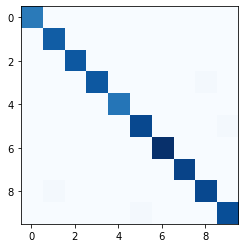

In [14]:
plt.imshow(conf_matrix_svc, interpolation='nearest', cmap=plt.cm.Blues)

*<strong>Q10)</strong> Compare your SVM model to your regression model.<br>- Create a function to obtain useful metrics for your SVM's performance<br>- How does this performance compare to that of the regression model? (and explain why this might be)*

In [15]:
def model_metric(model):
    return model.score(X_train, y_train)

print(f"Logistic Regression with {model_metric(lr)} vs SVM's {model_metric(svc)}")

Logistic Regression with 1.0 vs SVM's 0.9948032665181886


## Part 3: Trees, 35 Pts, 7 each
*<strong>Q11)</strong> Build an decision tree classification model.<br>- Create a DecisionTreeClassifier object which can be imported from sklearn's tree module.<br>- Call the .fit() function on your model with x_train and y_train as parameters.<br>- Call the .predict() function on your model with x_test as a parameter*

In [16]:
dcf = DecisionTreeClassifier()
dcf.fit(X_train, y_train)
y_predict_dcf = dcf.predict(X_test)

*<strong>Q12)</strong> Visualize the confusion matrix for this model<br>- Use sklearn's confusion matrix function to obtain a confusion matrix in np.array format<br>- Display this confusion matrix as a pandas DataFrame (with target class names in the columns and index fields).<br>- Display this confusion matrix as a heatmap using matplotlib.pyplot's .imshow() function.*

In [17]:
conf_matrix_dcf = confusion_matrix(y_test, y_predict_dcf, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
df = pd.DataFrame(data=conf_matrix_dcf)

df

,0,1,2,3,4,5,6,7,8,9
0,34,0,0,2,0,0,1,0,0,0
1,0,37,2,1,1,0,0,0,2,0
2,1,0,36,3,1,0,0,0,2,1
3,0,0,4,37,0,0,0,0,3,1
4,1,1,0,0,32,0,1,1,0,2
5,0,0,1,4,0,42,0,0,0,1
6,0,0,0,1,0,0,50,0,0,1
7,0,0,0,2,2,1,0,38,3,2
8,0,3,1,4,0,0,0,0,38,2
9,1,0,0,4,1,3,0,0,0,38


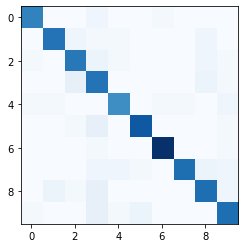

In [18]:
plt.imshow(conf_matrix_dcf, interpolation='nearest', cmap=plt.cm.Blues)

*<strong>Q13)</strong> Build an random forest classification model.<br>- Create a RandomForestClassifier object which can be imported from sklearn's tree module.<br>- Call the .fit() function on your model with x_train and y_train as parameters.<br>- Call the .predict() function on your model with x_test as a parameter*

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_predict_rfc = rfc.predict(X_test)

*<strong>Q14)</strong> Visualize the confusion matrix for this model<br>- Use sklearn's confusion matrix function to obtain a confusion matrix in np.array format<br>- Display this confusion matrix as a pandas DataFrame (with target class names in the columns and index fields).<br>- Display this confusion matrix as a heatmap using matplotlib.pyplot's .imshow() function.*

In [20]:
conf_matrix_rfc = confusion_matrix(y_test, y_predict_rfc, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
df = pd.DataFrame(data=conf_matrix_rfc)

df

,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,43,0,0,0,0,0,0,0,0
2,1,1,42,0,0,0,0,0,0,0
3,0,0,0,44,0,0,0,0,1,0
4,0,0,0,0,37,0,0,1,0,0
5,0,0,0,0,0,47,0,0,0,1
6,0,1,0,0,0,0,51,0,0,0
7,0,0,0,0,0,0,0,48,0,0
8,0,1,0,1,0,0,0,1,45,0
9,0,0,0,1,0,1,0,0,0,45


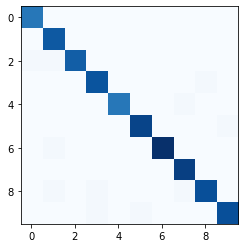

In [21]:
plt.imshow(conf_matrix_rfc, interpolation='nearest', cmap=plt.cm.Blues)

*<strong>Q15)</strong> How does the parameter n_estimators effect model performance?<br> - Write a for loop to iterate through many different sizes of trees.<br>- Graph and report your findings.* <br>- use gridsearch sklearn function to find the best n_estimators.*

In [22]:
sizes = range(2, 100, 2)
param_grid = dict(n_estimators=sizes)

grid_search = GridSearchCV(rfc, param_grid)
grid_result = grid_search.fit(X_train, y_train)
print(f"Best: {grid_result.best_score_} using n_estimator = {grid_result.best_params_['n_estimators']}")

Best: 0.9762439763183256 using n_estimator = 82


Text(0, 0.5, 'Log Loss')

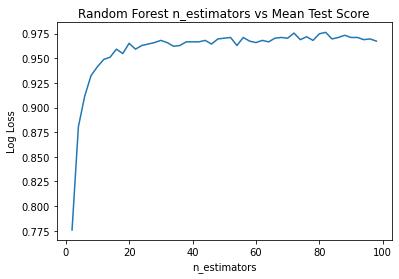

In [23]:
means = grid_result.cv_results_['mean_test_score']

plt.errorbar(sizes, means)
plt.title("Random Forest n_estimators vs Mean Test Score")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

## Graduate Student's Problem, 40Pts, 10 for each
(Or extra credit for undergraduates)<br><br>*<strong>Q1)</strong> Load mnist and create a baseline RandomForest model<br>- Load the mnist dataset from the keras datasets library (or find the dataset online and import it with your method of choice).<br>- Transform the shape of your input data from (len(data), 28, 28) to (len(data), 28 * 28).<br>- Create a RandomForestClassifier, train on your training data, and obtain an accuracy score with your test data.

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(path="mnist.npz")

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [25]:
num_trees = 10
rfc = RandomForestClassifier(n_estimators=num_trees)
rfc.fit(X_train, y_train)
y_predict_rfc = rfc.predict(X_test)

In [26]:
accuracy_score(y_test, y_predict_rfc)

0.9462

*<strong>Q2)</strong> Create a "Forest" of DecisionTreeClassifiers<br>- Create a list of n DecisionTreeClassifier objects, where n is the same number of trees as your RandomForestClassifier above.<br>- Loop through your newly created forest and train all of your trees individually.

In [5]:
decision_trees = [None] * num_trees
for decision_tree in decision_trees:
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)

<strong>Def: Prediction Confidence</strong><br>Given a set of predictions of classes (0,1,...,n), Confidence of class i = the number of times i occurs in your set of predictions divided by the total number of len(set of predictions).<br><br>EX1:<br>predictions = [1, 0, 2, 1, 1] (You can think of this as a forest with n_estimators = 5 for one instance of test data)<br>prediction_confidence_per_class = [.2, .6, .2] (percent of predictions equal to class i)<br><br>EX2:<Br>predictions = [[1, 3, 3, 3, 3, 3, 1, 1, 1, 3], [2, 0, 2, 2, 2, 2, 2, 2, 2, 0]] (for two instances, n_estimators=10)<br>prediction_confidence_per_class = [[0, .4, 0, .6], [.2, 0, .8, 0]]*

*<strong>Q3)</strong> Access the predictions from all of your trees and calculate prediction confidence<br>- Run the .predict() function on your test data for each tree in your forest. (you should get data of shape (len(x_test), n_estimators)<br>- Transform your raw predictions into a count of predictions for each class. (should be of shape (len(x_test), n_classes)<br>- Transform your prediction count data into prediction confidence as explained above. (should be of shape (len(x_test), n_classes)*

*<strong>Q4)</strong> Find your ensemble accuracy<br>- For all test data, make an ensemble prediction (Hint: it has something to do with your confidence values).<br>- Obtain an accuracy score and compare it to your RandomForestClassifier's score above.*